In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:

data = [

[5, 4, 3, 3, 2, 5, 5, 4, 4, 2, 1, 5, 4, 4, 2, 2, 2, 4, 3, 2, 3, 5, 2, 4, 3, 4, 2, 4, 5, 2, 2, 4],
[5, 4, 2, 3, 2, 4, 5, 4, 2, 3, 4, 5, 4, 3, 2, 5, 3, 5, 3, 2, 2, 4, 4, 2, 5, 3, 4, 3, 1, 3, 4, 2],
[5, 4, 3, 3, 2, 4, 5, 4, 1, 2, 1, 5, 3, 1, 4, 3, 2, 5, 2, 4, 3, 4, 2, 5, 5, 2, 3, 1, 2, 2, 1, 5],
[5, 4, 2, 3, 2, 5, 5, 4, 4, 3, 2, 5, 3, 3, 1, 2, 5, 3, 5, 1, 3, 5, 2, 1, 4, 5, 1, 4, 2, 5, 1, 3],
[5, 4, 3, 4, 2, 4, 5, 4, 3, 3, 2, 4, 5, 4, 2, 4, 4, 2, 3, 3, 5, 3, 3, 4, 3, 4, 2, 4, 2, 3, 2, 3],
[5, 4, 3, 4, 2, 4, 5, 4, 3, 3, 2, 4, 4, 1, 4, 3, 5, 2, 3, 4, 2, 2, 4, 3, 2, 4, 0, 2, 1, 2, 1, 3],
[5, 4, 4, 3, 2, 5, 5, 4, 3, 3, 5, 3, 5, 2, 5, 4, 1, 2, 3, 2, 1, 3, 4, 2, 3, 4, 3, 2, 4, 5, 1, 4],
[4, 4, 3, 2, 2, 5, 5, 5, 4, 3, 2, 5, 4, 3, 2, 4, 2, 0, 5, 4, 2, 2, 4, 5, 5, 4, 1, 4, 3, 0, 4, 4],
[4, 4, 3, 4, 2, 4, 5, 5, 3, 4, 1, 5, 3, 4, 2, 2, 4, 1, 4, 5, 3, 3, 1, 2, 4, 4, 3, 4, 2, 3, 4, 3],
[5, 4, 3, 4, 2, 5, 5, 4, 3, 4, 2, 2, 5, 4, 3, 2, 4, 2, 0, 4, 5, 1, 3, 4, 3, 1, 0, 3, 4, 5, 1, 2],

]

/var/folders/9c/rtwkp2x53z9djyvy60nrjp8h0000gn/T/ipykernel_98626/2322970912.py:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x, means, yerr=std_devs, fmt='o', ecolor='red', capsize=5, linestyle='-', marker='o', markersize=5)


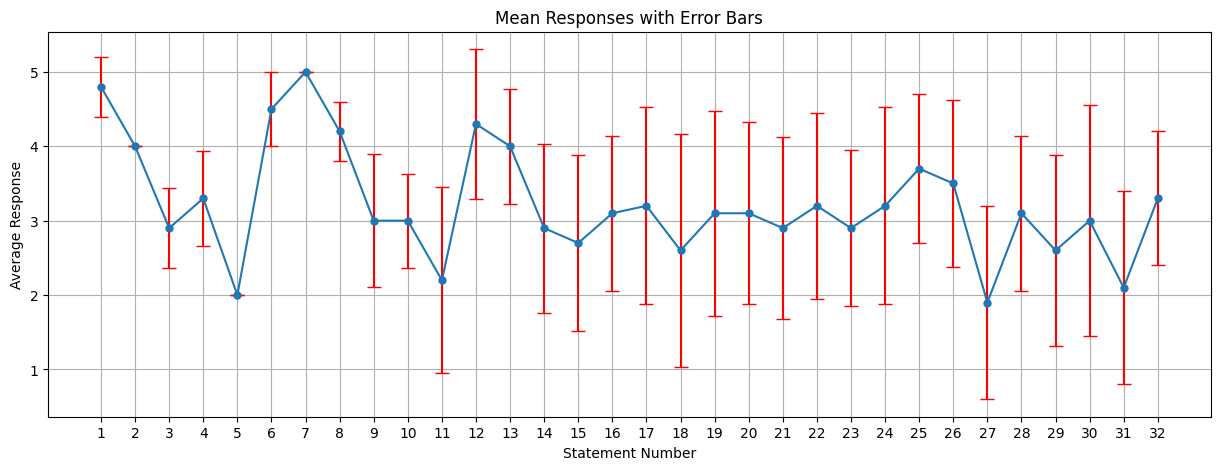

In [6]:
responses_array = np.array(data)

means = np.mean(responses_array, axis=0)
std_devs = np.std(responses_array, axis=0)

x = np.arange(1, 33)  
plt.figure(figsize=(15, 5))
plt.errorbar(x, means, yerr=std_devs, fmt='o', ecolor='red', capsize=5, linestyle='-', marker='o', markersize=5)
plt.title('Mean Responses with Error Bars, English')
plt.xlabel('Statement Number')
plt.ylabel('Average Response')
plt.grid(True)
plt.xticks(x)
plt.show()

In [8]:
data = [

[3, 4, 2, 2, 2, 4, 4, 5, 2, 3, 2, 5, 4, 4, 3, 3, 4, 2, 2, 3, 5, 3, 3, 3, 3, 2, 3, 5, 2, 3, 2, 3],
[5, 4, 3, 4, 2, 4, 4, 4, 3, 3, 2, 4, 4, 4, 3, 4, 3, 3, 2, 4, 5, 3, 4, 2, 2, 3, 3, 3, 3, 2, 3, 4],
[3, 4, 3, 3, 2, 4, 5, 4, 3, 2, 3, 3, 4, 3, 2, 3, 3, 3, 1, 1, 4, 4, 4, 2, 3, 1, 3, 1, 5, 3, 2, 2],
[4, 4, 3, 3, 2, 4, 5, 4, 3, 3, 1, 4, 4, 4, 3, 4, 4, 3, 4, 4, 5, 3, 3, 2, 5, 4, 3, 2, 1, 4, 3, 3],
[4, 4, 3, 3, 2, 4, 5, 4, 4, 3, 3, 5, 4, 5, 2, 2, 3, 2, 2, 3, 5, 3, 4, 3, 4, 3, 2, 3, 2, 4, 3, 2],
[4, 4, 3, 3, 2, 4, 5, 4, 3, 2, 2, 5, 3, 4, 2, 4, 4, 5, 2, 3, 2, 4, 3, 4, 2, 3, 4, 3, 3, 2, 2, 3],
[4, 4, 3, 3, 2, 4, 5, 4, 4, 3, 2, 5, 5, 4, 3, 4, 3, 3, 4, 4, 3, 3, 4, 2, 3, 3, 4, 3, 3, 5, 2, 4],
[4, 4, 2, 3, 1, 4, 5, 4, 3, 3, 1, 3, 5, 5, 4, 4, 2, 0, 3, 2, 2, 5, 3, 3, 2, 4, 3, 3, 3, 4, 3, 2],
[4, 4, 3, 2, 3, 4, 5, 5, 2, 0, 4, 5, 4, 4, 1, 2, 2, 3, 3, 0, 5, 3, 2, 4, 1, 4, 3, 3, 4, 3, 2, 2],
[4, 4, 3, 3, 2, 4, 5, 4, 3, 2, 2, 5, 4, 3, 2, 3, 4, 3, 4, 1, 3, 4, 4, 1, 3, 4, 3, 1, 3, 2, 2, 4],

]

/var/folders/9c/rtwkp2x53z9djyvy60nrjp8h0000gn/T/ipykernel_98626/2582822198.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x, means, yerr=std_devs, fmt='o', ecolor='red', capsize=5, linestyle='-', marker='o', markersize=5)


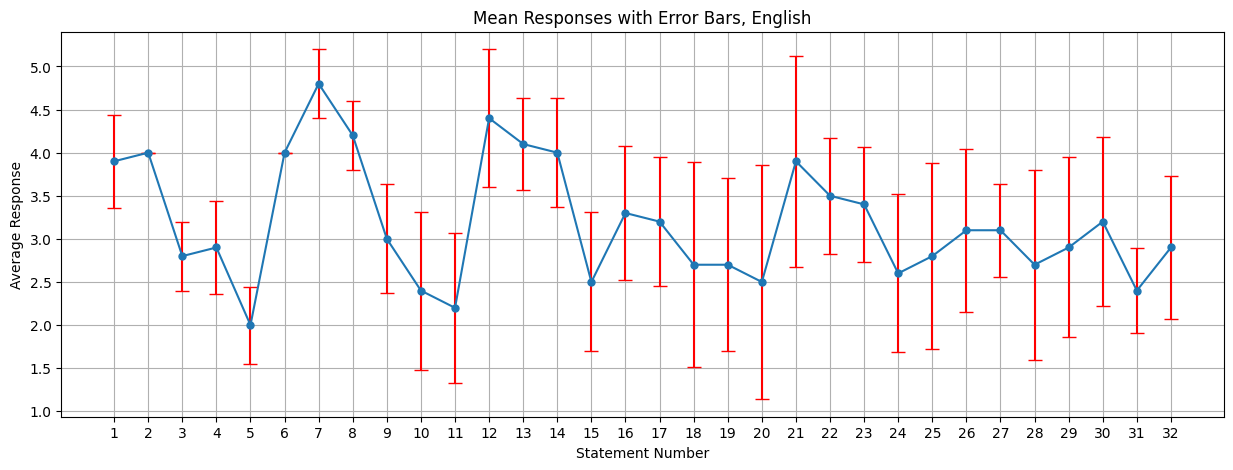

In [9]:
responses_array = np.array(data)

means = np.mean(responses_array, axis=0)
std_devs = np.std(responses_array, axis=0)

x = np.arange(1, 33)  
plt.figure(figsize=(15, 5))
plt.errorbar(x, means, yerr=std_devs, fmt='o', ecolor='red', capsize=5, linestyle='-', marker='o', markersize=5)
plt.title('Mean Responses with Error Bars, Spanish')
plt.xlabel('Statement Number')
plt.ylabel('Average Response')
plt.grid(True)
plt.xticks(x)
plt.show()